In [25]:
#Loading Libraries
import pandas as pd
import numpy as np

advDataset = pd.read_csv(r'Advertising.csv') #Importing Dataset

#Checking Datatype
advDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [28]:
#Column "Day" is in object form and Pandas Dtype only has objecttype instead of str type

type(advDataset['Day'][1]) #These Characters are in str format in as python datatype.

str

In [37]:
#Identifing Nulls and NaN
advDataset[advDataset.TV.isnull()] #Identifing Nulls and NaN in 'TV'

,Sno,TV,Radio,Newspaper,Day,Sales
68,69,NaN,27.5,11.0,NaN,12.8


In [38]:
advDataset[advDataset.Radio.isnull()] #Identifing Nulls and NaN in 'Radio'

,Sno,TV,Radio,Newspaper,Day,Sales
42,43,293.6,NaN,1.8,NaN,10.4


In [39]:
advDataset[advDataset.Newspaper.isnull()] #Identifing Nulls and NaN in 'Newspaper'

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2


In [40]:
advDataset[advDataset.Day.isnull()] #Identifing Nulls and NaN in 'Day'

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2
42,43,293.6,NaN,1.8,NaN,10.4
68,69,NaN,27.5,11.0,NaN,12.8


In [41]:
advDataset[advDataset.Sales.isnull()] #Identifing Nulls and NaN in 'Sales'

,Sno,TV,Radio,Newspaper,Day,Sales


In [45]:
#Count of Missing Values = 3 because comman rows in 'TV' , 'Newspaper' , 'Radios' is missing in 'Day'

advDataset = advDataset.dropna() #Dropping NaN's
advDataset.info() #Confirming Number

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [46]:
#Encoding Categorical Variables which is under Days Column
advDataset.Day.unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [77]:
xColumns = ['TV','Radio','Newspaper','Day'] #Saving all columns
catColumns = ['Day']          #Saving Categorical Columns
encodeAdv = pd.get_dummies(advDataset[xColumns], columns = catColumns, drop_first=True) #Replacing Columns 'Holiday' is dropped
encodeAdv.columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

In [79]:
#Desciptive Summary for all Variable together. For individual Summary, use 'encodeAdv.columnName.describe()'
advDataset.describe()

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [81]:
encodeAdv.describe() #including Days and Excluding Sales

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000


# Visualisation

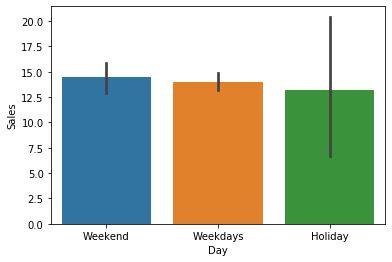

In [84]:
#importing Libraries

import matplotlib.pyplot as plt
import seaborn as sn
#Makes sure that the graph is drawn beneath the code
%matplotlib inline 

sn.barplot(x = 'Day', y = 'Sales', data = advDataset);  #code for bargraph

Represents that the difference between the sales wrt to Day is very less. However, the confidence level varies.

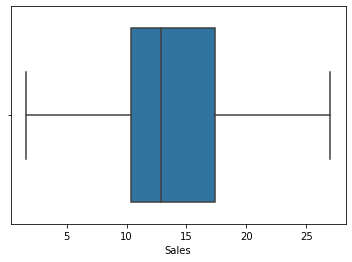

In [85]:
sn.boxplot(advDataset['Sales']); #Code of BoxPlot

There are no Outliers

# Spliting the Dataset into Train:Test = 70:30

In [169]:
#importing libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = sm.add_constant(encodeAdv)    #adding constant to the dataset and copying the set to X
Y = advDataset['Sales']           #Copying the Sales to Y

#Spliting the dataset, 0.7 represents 70:30 ratio, 81 is seed for the randomisation
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7,random_state = 81 )

# Building Model

In [170]:
advModelOne = sm.OLS(train_y,train_X).fit()
advModelOne.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.013  
Dependent Variable: Sales            AIC:                823.5269
Date:               2020-08-12 19:22 BIC:                838.1268
No. Observations:   137              Log-Likelihood:     -406.76 
Df Model:           4                F-statistic:        0.5602  
Df Residuals:       132              Prob (F-statistic): 0.692   
R-squared:          0.017            Scale:              23.045  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          8.5776    1.0314   8.3167  0.0000   6.5374  10.6177
TV             0.0066    0.0065   1.0184  0.3103  -0.0062   0.0195
Radio          0.0056    0.0292   0.1925  0.8476  -0.0522   0.0634
Newspaper     -0.0212    0.0207  -1.0248  0.3073  -0.0622   0.0198
Day_Weekdays   4.7365    0.4883   9.6995  0.0000   3.7706   5.7025
Day_Weekend    3.8410    1.1091   3.4633  0.0007   1.6472   6.0349
-----------------------------------------------------------------
Omnibus:          5.539   Durbin-Watson:      1.987              
Prob(Omnibus):    0.063   Jarque-Bera (JB):   5.638              
Skew:             0.471   Prob(JB):           0.060              
Kurtosis:         2.681   Condition No.:      1469057289137641472
=================================================================
* The condition number is large (1e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

R-squared says only 1.7% is explained. Adj-R-sqaured is negative. Prob(F-stat) is greater than 0.05, and the model is not a good fit. Significant Variables are Days_Weekdays and Days_Weekends only. We need to improve model by removing variables

### Multi-Collinearity

In [171]:
xColumns = encodeAdv.columns #Saving Columns of Dependent Variable

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor             #importing Package
def get_vif_factors( X ):                                                              #Func to calculate Variance
    vif = [ variance_inflation_factor( X.values, i ) for i in range( X.shape[1] ) ]    #Loop to calculate Variance
    vif_factors = pd.DataFrame()                                                       #Creating DataFrame for Display
    vif_factors['column'] = X.columns                                                  #Creating Column for columns Names
    vif_factors['vif'] = vif                                                           #Adding respective VIF
    return vif_factors                                                                 #Return DataFrame

In [173]:
vif_factors = get_vif_factors( X[xColumns] )    #Calling func
vif_factors                                     #Printing DataFrame

,column,vif
0,TV,5.972512
1,Radio,3.930583
2,Newspaper,3.499641
3,Day_Weekdays,4.513938
4,Day_Weekend,4.048673


In [174]:
highVIF = vif_factors[vif_factors.vif > 4].column #finding columns with high vif and are correlated
highVIF #printing

0              TV
3    Day_Weekdays
4     Day_Weekend
Name: column, dtype: object

In [175]:
columnsToDelete = ['TV','Day_Weekend','Day_Weekdays'] #Columns to be deleted

In [176]:
xNewColumns = list(set(xColumns)-set(columnsToDelete)) #Removing columns
get_vif_factors(X[xNewColumns])                        #Checking New VIF

,column,vif
0,Radio,2.804843
1,Newspaper,2.804843


In [196]:
#VIF are less than 4, running new model

train_X=train_X[xNewColumns]                 #Changing to new columns only
advModelTwo = sm.OLS(train_y,train_X).fit()  #Running the new model
advModelTwo.summary2()                       #Display the summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.672   
Dependent Variable:     Sales            AIC:                         968.7716
Date:                   2020-08-12 19:35 BIC:                         974.6116
No. Observations:       137              Log-Likelihood:              -482.39 
Df Model:               2                F-statistic:                 141.4   
Df Residuals:           135              Prob (F-statistic):          7.67e-34
R-squared (uncentered): 0.677            Scale:                       67.963  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Radio          0.2781        0.0409      6.7925      0.0000      0.1971      0.3591
Newspaper      0.1307        0.0310      4.2166      0.0000      0.0694      0.1920
------------------------------------------------------------------------------
Omnibus:                  1.437             Durbin-Watson:               1.704
Prob(Omnibus):            0.488             Jarque-Bera (JB):            1.246
Skew:                     -0.051            Prob(JB):                    0.536
Kurtosis:                 2.544             Condition No.:               3    
==============================================================================

"""

New Model has Adj.R.sqr explains 67.2% model. 70% is required. Prob(F-Stat) is less than 0.05 which shows that model is a very good fit.

# Residual Analysis

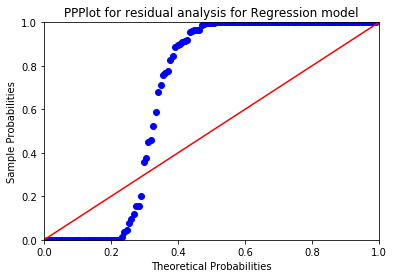

In [197]:
#Libraries are already imported
probPlot = sm.ProbPlot(advModelTwo.resid); # Returns Residual ie difference between observed and fitted values.
probPlot.ppplot(line='45');                # Sets the Normal line to 45 degree
plt.title("PPPlot for residual analysis for Regression model") #Sets the title of Graph
plt.show() #Used to show Plot Residual vs Normal Distribution

The points are not close to the red line which shows that the errors are not distributed normally.

### Scatter Plot of Residual Analysis

In [198]:
def getStandVals( vals ):          #Defining Function to calculate Std Values
    return (vals - vals.mean())/vals.std()    #Return Statement

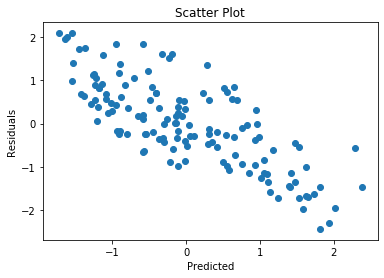

In [199]:
plt.scatter(getStandVals(advModelTwo.fittedvalues),getStandVals(advModelTwo.resid)) #Generate Scatter plt errors vs prediction
plt.title("Scatter Plot") #Set title
plt.xlabel("Predicted")   #X-Axis Title
plt.ylabel("Residuals")   #Y-Axis Title
plt.show()                #Show Graph

Not Parallel Line - Heteroscedasticity - Residuals doesnt have constant variance

# Outlier Analysis

In [200]:
from scipy.stats import zscore  #importing package to calculate z-score
advDataset['zScoreSales'] = zscore(advDataset.Sales) #Adding new Column 'zScoreSales' and putting z-scores for outlier
advDataset[(advDataset.zScoreSales>3.0)|(advDataset.zScoreSales<-3)] #Printing Outliers with zscore of > 3 or < -3

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales


No Outliers Found from Z-Score

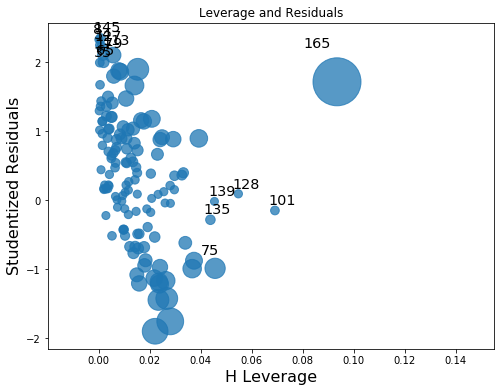

In [201]:
#Leverage for Finding Influencing observations

from statsmodels.graphics.regressionplots import influence_plot #impoting package
fig, ax = plt.subplots( figsize=(8,6) )   #Set the size
influence_plot( advModelTwo, ax = ax )    #making influence plot
plt.title( "Leverage and Residuals")      #Setting title
plt.show();                               #Showing Graph

Leverage Value of More than 3(k+1)/n ie 3(2+1)/137 = 0.065 approx. Hence, observations at 101 and 165 should be removed

In [202]:
advDataset[advDataset.index.isin([101,165])] #Printing the observations that needs to be removed

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales
101,102,296.4,36.3,100.9,Weekend,22.1,1.544276
165,166,234.5,3.4,84.8,Weekend,25.4,2.181452


In [203]:
newTrainX = train_X.drop( [101, 165], axis = 0) #Dropping observation from x-axis
newTrainY = train_y.drop( [101, 165], axis = 0) #Dropping observation from y-axis

In [204]:
advModelThree = sm.OLS(newTrainY,newTrainX).fit()  #Running the new model
advModelThree.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.666   
Dependent Variable:     Sales            AIC:                         953.7379
Date:                   2020-08-12 19:36 BIC:                         959.5485
No. Observations:       135              Log-Likelihood:              -474.87 
Df Model:               2                F-statistic:                 135.4   
Df Residuals:           133              Prob (F-statistic):          8.40e-33
R-squared (uncentered): 0.671            Scale:                       67.501  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Radio          0.2951        0.0424      6.9596      0.0000      0.2112      0.3790
Newspaper      0.1138        0.0335      3.3962      0.0009      0.0475      0.1801
------------------------------------------------------------------------------
Omnibus:                  1.478             Durbin-Watson:               1.691
Prob(Omnibus):            0.478             Jarque-Bera (JB):            1.247
Skew:                     -0.023            Prob(JB):                    0.536
Kurtosis:                 2.531             Condition No.:               3    
==============================================================================

"""

# Testing Model

In [205]:
predY = np.power( advModelThree.predict( test_X[newTrainX.columns] ), 2) #Saving Predicted Value in predY

In [213]:
#RMSE For Validation
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(predY, test_y))

187.44579038081832

# Manual Calculation

In [211]:
advDataset[1:2] #picking one Data

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales
1,2,44.5,39.3,45.1,Weekdays,8.0,-1.178201


Model 1 - Equation --> Sales = 8.57 + 0.0066*TV + 0.0056*Radio - 0.0212*Newspaper + 4.7365*Day_Weekday + 3.841*Day_Weekend

In [214]:
8.57+0.0066*44.5+0.0056*39.3-0.0212*45.1+4.7365

12.864159999999998

Model 2 - Equation --> Sales = 0.2951Radio + 0.1138Newspaper

In [222]:
0.2951*39.3 + 0.1138*45.1

16.729809999999997